In [1]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 55.3MB/s]


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from six.moves import cPickle 
%matplotlib inline 
import pickle
import matplotlib.image as mpimg
import os
import numpy as np

test_data=[]
train_data=[]
test_data_gray=[]
train_data_gray=[]
test_data_gray_nor=[]
train_data_gray_nor=[]
test_data_gray_nor_flat=[]
train_data_gray_nor_flat=[]
train_data_shuffled=[]
train_label_shuffled=[]
test_data_shuffled=[]
test_label_shuffled=[]


test_label=[]
train_label=[]
#/content/CIFAR10/test/airplane
folder1 = '/content/CIFAR10/train/airplane'
folder2 = '/content/CIFAR10/train/automobile'
folder3 = '/content/CIFAR10/train/bird'
folder4 = '/content/CIFAR10/train/cat'

folder1_1 = '/content/CIFAR10/test/airplane'
folder2_2 = '/content/CIFAR10/test/automobile'
folder3_3 = '/content/CIFAR10/test/bird'
folder4_4 = '/content/CIFAR10/test/cat'



#function to load images
def load(folder , number):
    images = []
    labels = []
    for filename in os.listdir(folder):

            try:
                img = mpimg.imread(os.path.join(folder, filename))

                if img is not None:
                    images.append(img)
                    labels= create_label(labels,number)

            except:
                print('Cant import ' + filename)
    images = np.asarray(images)
    labels = np.asarray(labels)
    return images,labels


def  create_label(labels,number):
      label=labels
      if number == 1:
          label.append( [1,0,0,0])
	      
      elif number == 2:
          label.append( [0,1,0,0])
      	
      elif number == 3:
          label.append( [0,0,1,0])
      	
      else:
          label.append( [0,0,0,1])
      	

      return label


#def create_matrix():
      #load train and label files
images1,label1=load(folder1,1)

print(images1.shape)


images2,label2=load(folder2,2)

print(images2.shape)


images3,label3=load(folder3,3)

print(images3.shape)


images4,label4=load(folder4,4)

print(images4.shape)

train1=np.concatenate((images1,images2), axis=0)
train2=np.concatenate((images3,images4), axis=0)
train_data=np.concatenate((train1,train2), axis=0)
print(train_data.shape)

train_label1=np.concatenate((label1,label2), axis=0)
train_label2=np.concatenate((label3,label4), axis=0)
train_label=np.concatenate((train_label1,train_label2), axis=0)
print(train_label.shape)

#load test and label files
images1_1,label1_1=load(folder1_1,1)

print(images1_1.shape)


images2_2,label2_2=load(folder2_2,2)

print(images2_2.shape)


images3_3,label3_3=load(folder3_3,3)

print(images3_3.shape)


images4_4,label4_4=load(folder4_4,4)

print(images4_4.shape)

test1=np.concatenate((images1_1,images2_2), axis=0)
test2=np.concatenate((images3_3,images4_4), axis=0)
test_data=np.concatenate((test1,test2), axis=0)
print(test_data.shape)
test_label1_1=np.concatenate((label1_1,label2_2), axis=0)
test_label2_2=np.concatenate((label3_3,label4_4), axis=0)
test_label=np.concatenate((test_label1_1,test_label2_2), axis=0)
print(test_label.shape)
#  return test_data,train_data,train_label,test_label

#test_data,train_data,train_label,test_label = create_matrix()
test_data = np.asarray(test_data)
test_data_gray = np.asarray(test_data_gray)
train_data = np.asarray(train_data)
train_data_gray = np.asarray(train_data_gray)







(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(5000, 32, 32, 3)
(20000, 32, 32, 3)
(20000, 4)
(1000, 32, 32, 3)
(1000, 32, 32, 3)
(1000, 32, 32, 3)
(1000, 32, 32, 3)
(4000, 32, 32, 3)
(4000, 4)


In [3]:
import cv2

# gray 
test_data_gray=np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_data])
train_data_gray=np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_data])
print("hello")
print (test_data_gray.shape)


hello
(4000, 32, 32)


In [4]:
#normalized
test_data_gray_nor= np.divide(test_data_gray,255)
train_data_gray_nor= np.divide(train_data_gray,255)
print(train_data_gray_nor.shape)
#print(train_data_gray_nor)

(20000, 32, 32)


In [5]:
#flat
train_data_gray_nor_flat= train_data_gray_nor.reshape(-1,1024)
test_data_gray_nor_flat= test_data_gray_nor.reshape(-1,1024)
print(train_data_gray_nor.shape)
print(train_data_gray_nor_flat.shape)


(20000, 32, 32)
(20000, 1024)


In [6]:
#shuffled
def shuffle_unison(array1, array2):
  shuffler = np.random.permutation(len(array1))
  array1_shuffled = array1[shuffler]
  array2_shuffled = array2[shuffler]
  return array1_shuffled, array2_shuffled


train_data_shuffled, train_label_shuffled = shuffle_unison(train_data_gray_nor_flat, train_label)
test_data_shuffled, test_label_shuffled = shuffle_unison(test_data_gray_nor_flat, test_label)
print(train_data_shuffled.shape)
print(test_data_shuffled.shape)


(20000, 1024)
(4000, 1024)


In [7]:
def sigmoid(x):
    ans = 1 / (1 + np.exp(-x))
    return ans

In [8]:
# creating the matrix of weights randomly and the biases with all zeros.
W0 = np.random.randn(16, 1024)
W1 = np.random.randn(16, 16)
W2 = np.random.randn(4, 16)
b0 = np.zeros((16, 1))
b1 = np.zeros((16, 1))
b2 = np.zeros((4, 1))

In [9]:
#feedforward
minimize_train_set = train_data_shuffled[:200]
# feedforward for all datas
def feedforward(W0,W1,W2,b0,b1,b2):
  counter = 0
  for i in range(len(minimize_train_set)):
      # label and fetures of one input
      reshape_train = minimize_train_set[i].reshape(-1,1)
      # calculate precptron output with activiation sigmoid function
      S0 = reshape_train
      S1 = sigmoid(W0 @ S0 + b0)
      S2 = sigmoid(W1 @ S1 + b1)
      S3 = sigmoid(W2 @ S2 + b2)
      # find  index of maximum  of output
      # find index of maximum of input label
      if  np.argmax(S3) == np.argmax(train_label_shuffled[i],axis=0) :
          # if  correct counter++
          counter += 1
  # print accuracy and time of execution
  print("Accuracy is : " + str(counter*100 / 200))
  

feedforward(W0,W1,W2,b0,b1,b2)



Accuracy is : 20.5


Accuracy is : 0.4
Duration: 0:01:41.239594


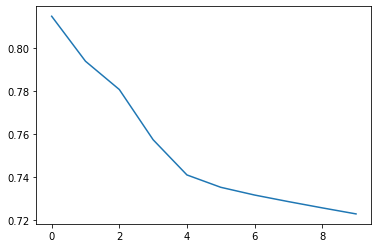

In [10]:
# Backpropagation
from datetime import datetime
start_time = datetime.now()
def merge(data,label):
  set=[]
  for i in range(label.T.shape[1]):
      set.append((data.T[:, i].reshape(1024, 1), label.T[:, i].reshape(4, 1)))
  return set

W0 = np.random.normal(size=(16,1024))
W1 = np.random.normal(size=(16, 16))
W2 = np.random.normal(size=(4, 16))
b0 = np.zeros((16, 1))
b1 = np.zeros((16, 1))
b2 = np.zeros((4, 1))
costs = []
num_of_train = 200
batch_size = 16
num_of_epochs = 10
batch_num = (20//16)
learning_rate = 0.3
train_set = []
test_set = []
#merge data and  label 
train_set=merge(train_data_shuffled , train_label_shuffled )
test_set=merge(test_data_shuffled , test_label_shuffled)

for epo in range(num_of_epochs):
    all_batches = []
    for x in range(0, 200, batch_size) :
        end=x+batch_size
        all_batches.append(train_set[x:end])

    for ba in all_batches:
        # initialize gradians for weights and bias off all layers
        g_W0 = np.zeros((16, 1024))
        g_W1 = np.zeros((16, 16))
        g_W2 = np.zeros((4, 16))
        g_b0 = np.zeros((16, 1))
        g_b1 = np.zeros((16, 1))
        g_b2 = np.zeros((4, 1))
        
        for _img, label in ba:
            
            a1 = sigmoid(W0 @ _img + b0)
            a2 = sigmoid(W1 @ a1 + b1)
            a3 = sigmoid(W2 @ a2 + b2)
            
            # The last layer Computing weight
            for j in range(g_W2.shape[0]):
                for k in range(g_W2.shape[1]):
                    g_W2[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]
            
            #The last layer Computing bias
            for j in range(g_b2.shape[0]):
                    g_b2[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            
            #3rd layer Computing activation
            delta_2 = np.zeros((16, 1))
            for k in range(16):
                for j in range(4):
                    delta_2[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * W2[j, k]
            
            # 3rd layer Computing weight
            for k in range(g_W1.shape[0]):
                for m in range(g_W1.shape[1]):
                    g_W1[k, m] += delta_2[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
            #3rd layer Computing bias
            for k in range(g_b1.shape[0]):
                    g_b1[k, 0] += delta_2[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    
            
            #  2nd layer computing activation
            delta_1 = np.zeros((16, 1))
            for m in range(16):
                for k in range(16):
                    delta_1[m, 0] += delta_2[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * W1[k, m]
            
            # 2nd layer computing weight
            for m in range(g_W0.shape[0]):
                for v in range(g_W0.shape[1]):
                    g_W0[m, v] += delta_1[m, 0] * a1[m,0] * (1 - a1[m, 0]) * _img[v, 0]
            # 2nd layer computing bias
            for m in range(g_b0.shape[0]):
                    g_b0[m, 0] += delta_1[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
        W2 = W2 - (learning_rate * (g_W2 / batch_size))
        W1 = W1 - (learning_rate * (g_W1 / batch_size))
        W0 = W0 - (learning_rate * (g_W0 / batch_size))
        
        b2 = b2 - (learning_rate * (g_b2 / batch_size))
        b1 = b1 - (learning_rate * (g_b1 / batch_size))
        b0 = b0 - (learning_rate * (g_b0 / batch_size))
    
    # calculate costs
    cost = 0
    for train_data in train_set[:200]:
        a0 = train_data[0]
        a1 = sigmoid(W0 @ a0 + b0)
        a2 = sigmoid(W1 @ a1 + b1)
        a3 = sigmoid(W2 @ a2 + b2)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= 200
    costs.append(cost)
# plot costs per epoch diagram
epoch_size = [x for x in range(num_of_epochs)]
plt.plot(epoch_size, costs)

# feed forward for calculate accuracy of train
counter2 = 0
for train_data in train_set[:200]:
    a0 = train_data[0]
    a1 = sigmoid(W0 @ a0 + b0)
    a2 = sigmoid(W1 @ a1 + b1)
    a3 = sigmoid(W2 @ a2 + b2)
    
    index = np.where(a3 == np.amax(a3))
    max_index = np.where(train_data[1] == np.amax(train_data[1]))
    
    if index == max_index:
        counter2+= 1
        
print("Accuracy is : " + str(counter2 / 200))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))





1
Avg_cost : 0.6813665991200091
Accuracy is : 0.445
Duration: 0:00:01.431198
2
Avg_cost : 0.7308082557412722
Accuracy is : 0.4
Duration: 0:00:01.405430
3
Avg_cost : 0.7261948465091648
Accuracy is : 0.43
Duration: 0:00:01.408855
4
Avg_cost : 0.7468378654495906
Accuracy is : 0.37
Duration: 0:00:01.417005
5
Avg_cost : 0.7164153946232503
Accuracy is : 0.42
Duration: 0:00:01.432656
6
Avg_cost : 0.7445115488530594
Accuracy is : 0.355
Duration: 0:00:01.464566
7
Avg_cost : 0.73671110178541
Accuracy is : 0.35
Duration: 0:00:01.470221
8
Avg_cost : 0.7320969783171118
Accuracy is : 0.43
Duration: 0:00:01.470152
9
Avg_cost : 0.7139208937067717
Accuracy is : 0.465
Duration: 0:00:01.525671
10
Avg_cost : 0.7025750370218704
Accuracy is : 0.45
Duration: 0:00:01.413890
Avg_ten_cost : 0.723143852112751
Avg_ten_Accuracy : 0.41150000000000003


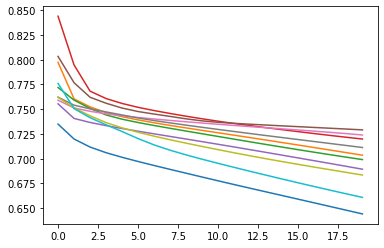

In [37]:
# Vectorization
from numpy.core.fromnumeric import transpose
from datetime import datetime

sum_10_costs=[]
sum_10_accuracy=[]
def vectorization ():

  start_time = datetime.now()
  def merge(data,label):
    set=[]
    for i in range(label.T.shape[1]):
        set.append((data.T[:, i].reshape(1024, 1), label.T[:, i].reshape(4, 1)))
    return set

  W0 = np.random.normal(size=(16,1024))
  W1 = np.random.normal(size=(16, 16))
  W2 = np.random.normal(size=(4, 16))
  b0 = np.zeros((16, 1))
  b1 = np.zeros((16, 1))
  b2 = np.zeros((4, 1))
  costs = []
  avg_cost=0
  num_of_train = 200
  batch_size = 16
  num_of_epochs = 20
  batch_num = (20//16)
  learning_rate = 0.3
  train_set = []
  test_set = []
  #merge data and  label 
  train_set=merge(train_data_shuffled , train_label_shuffled )
  test_set=merge(test_data_shuffled , test_label_shuffled)

  for epo in range(num_of_epochs):
      
      all_batches = []
      for x in range(0, 200, batch_size) :
          end=x+batch_size
          all_batches.append(train_set[x:end])

      for ba in all_batches:
          # initialize gradians for weights and bias off all layers
          g_W0 = np.zeros((16, 1024))
          g_W1 = np.zeros((16, 16))
          g_W2 = np.zeros((4, 16))
          g_b0 = np.zeros((16, 1))
          g_b1 = np.zeros((16, 1))
          g_b2 = np.zeros((4, 1))
          
          for _img, label in ba:
              
              a1 = sigmoid(W0 @ _img + b0)
              a2 = sigmoid(W1 @ a1 + b1)
              a3 = sigmoid(W2 @ a2 + b2)



              # The last layer Computing weight
              g_W2 += 2 * (a3 - label) * a3 * (1 - a3) @ np.transpose(a2)
              
              #The last layer Computing bias
              g_b2 += 2 * (a3 - label) * a3 * (1 - a3)


              #3rd layer Computing activation
              delta_2 = np.zeros((16, 1))
              delta_2 += np.transpose(W2) @ (2 * (a3 - label) * (a3 * (1 - a3)))                

              # 3rd layer Computing weight
              g_W1 += ( a2 * (1 - a2) *delta_2) @ np.transpose(a1)
              
              #3rd layer Computing bias
              g_b1 += delta_2 * a2* (1 - a2)
              #  2nd layer computing activation
              delta_1 = np.zeros((16, 1))
              delta_1 +=   np.transpose(W1) @ (delta_2 * a2 * (1 - a2))
              
              # 2nd layer computing weight
              g_W0 += (delta_1 * a1* (1 - a1) ) @ np.transpose(_img)
              # 2nd layer computing bias
              g_b0 += delta_1 * a1* (1 - a1)
          
          W2 = W2 - (learning_rate * (g_W2 / batch_size))
          W1 = W1 - (learning_rate * (g_W1 / batch_size))
          W0 = W0 - (learning_rate * (g_W0 / batch_size))
          
          b2 = b2 - (learning_rate * (g_b2 / batch_size))
          b1 = b1 - (learning_rate * (g_b1 / batch_size))
          b0 = b0 - (learning_rate * (g_b0 / batch_size))
      
      # calculate costs
      cost = 0
      for train_data in train_set[:200]:
          a0 = train_data[0]
          a1 = sigmoid(W0 @ a0 + b0)
          a2 = sigmoid(W1 @ a1 + b1)
          a3 = sigmoid(W2 @ a2 + b2)

          for j in range(4):
              cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
              
      cost /= 200
      costs.append(cost)
  # plot costs per epoch diagram
  epoch_size = [x for x in range(num_of_epochs)]
  plt.plot(epoch_size, costs)
  avg_cost = sum(costs)/len(costs)
  print("Avg_cost : " + str(avg_cost))
  sum_10_costs.append(avg_cost) 
  # feed forward for calculate accuracy of train
  counter2 = 0
  for train_data in train_set[:200]:
      a0 = train_data[0]
      a1 = sigmoid(W0 @ a0 + b0)
      a2 = sigmoid(W1 @ a1 + b1)
      a3 = sigmoid(W2 @ a2 + b2)
      
      index = np.where(a3 == np.amax(a3))
      max_index = np.where(train_data[1] == np.amax(train_data[1]))
      
      if index == max_index:
          counter2+= 1
          
  print("Accuracy is : " + str(counter2 / 200))
  sum_10_accuracy.append(counter2 / 200)
  end_time = datetime.now()
  print('Duration: {}'.format(end_time - start_time))


for i in range(10):
  print(i+1)
  vectorization()

print("Avg_ten_cost : " + str(sum(sum_10_costs) / len(sum_10_costs)))
print("Avg_ten_Accuracy : " + str(sum(sum_10_accuracy) / len(sum_10_accuracy)))



1
Avg_cost : 0.6052990853713698
Accuracy is : 0.5715
Duration: 0:01:42.723914
2
Avg_cost : 0.6139199450845939
Accuracy is : 0.555375
Duration: 0:01:41.478341
3
Avg_cost : 0.6012145735552663
Accuracy is : 0.565
Duration: 0:01:41.812430
4
Avg_cost : 0.6104028090631428
Accuracy is : 0.56625
Duration: 0:01:42.351611
5
Avg_cost : 0.6298202269853947
Accuracy is : 0.51975
Duration: 0:01:43.008881
6
Avg_cost : 0.6055405293308903
Accuracy is : 0.558125
Duration: 0:01:41.815091
7
Avg_cost : 0.614459293489815
Accuracy is : 0.582625
Duration: 0:01:43.817387
8
Avg_cost : 0.5941908133931679
Accuracy is : 0.580375
Duration: 0:01:43.560693
9
Avg_cost : 0.6255908567757895
Accuracy is : 0.558125
Duration: 0:01:42.290145
10
Avg_cost : 0.6147688220547115
Accuracy is : 0.571625
Duration: 0:01:44.588057
Avg_ten_cost : 0.6115206955104142
Avg_ten_Accuracy : 0.5628750000000001


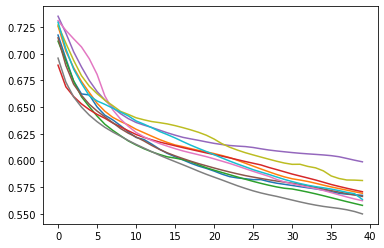

In [43]:
#TestingModel

# Vectorization_8000_train
from numpy.core.fromnumeric import transpose
from datetime import datetime

sum_10_costs=[]
sum_10_accuracy=[]
def vectorization ():

  start_time = datetime.now()
  def merge(data,label):
    set=[]
    for i in range(label.T.shape[1]):
        set.append((data.T[:, i].reshape(1024, 1), label.T[:, i].reshape(4, 1)))
    return set

  W0 = np.random.normal(size=(16,1024))
  W1 = np.random.normal(size=(16, 16))
  W2 = np.random.normal(size=(4, 16))
  b0 = np.zeros((16, 1))
  b1 = np.zeros((16, 1))
  b2 = np.zeros((4, 1))
  costs = []
  avg_cost=0
  num_of_train = 8000
  batch_size = 16
  num_of_epochs = 40
  batch_num = (20//16)
  learning_rate = 0.3
  train_set = []
  test_set = []
  #merge data and  label 
  train_set=merge(train_data_shuffled , train_label_shuffled )
  test_set=merge(test_data_shuffled , test_label_shuffled)

  for epo in range(num_of_epochs):
      
      all_batches = []
      for x in range(0, 8000, batch_size) :
          end=x+batch_size
          all_batches.append(train_set[x:end])

      for ba in all_batches:
          # initialize gradians for weights and bias off all layers
          g_W0 = np.zeros((16, 1024))
          g_W1 = np.zeros((16, 16))
          g_W2 = np.zeros((4, 16))
          g_b0 = np.zeros((16, 1))
          g_b1 = np.zeros((16, 1))
          g_b2 = np.zeros((4, 1))
          
          for _img, label in ba:
              
              a1 = sigmoid(W0 @ _img + b0)
              a2 = sigmoid(W1 @ a1 + b1)
              a3 = sigmoid(W2 @ a2 + b2)



              # The last layer Computing weight
              g_W2 += 2 * (a3 - label) * a3 * (1 - a3) @ np.transpose(a2)
              
              #The last layer Computing bias
              g_b2 += 2 * (a3 - label) * a3 * (1 - a3)


              #3rd layer Computing activation
              delta_2 = np.zeros((16, 1))
              delta_2 += np.transpose(W2) @ (2 * (a3 - label) * (a3 * (1 - a3)))                

              # 3rd layer Computing weight
              g_W1 += ( a2 * (1 - a2) *delta_2) @ np.transpose(a1)
              
              #3rd layer Computing bias
              g_b1 += delta_2 * a2* (1 - a2)
              #  2nd layer computing activation
              delta_1 = np.zeros((16, 1))
              delta_1 +=   np.transpose(W1) @ (delta_2 * a2 * (1 - a2))
              
              # 2nd layer computing weight
              g_W0 += (delta_1 * a1* (1 - a1) ) @ np.transpose(_img)
              # 2nd layer computing bias
              g_b0 += delta_1 * a1* (1 - a1)
          
          W2 = W2 - (learning_rate * (g_W2 / batch_size))
          W1 = W1 - (learning_rate * (g_W1 / batch_size))
          W0 = W0 - (learning_rate * (g_W0 / batch_size))
          
          b2 = b2 - (learning_rate * (g_b2 / batch_size))
          b1 = b1 - (learning_rate * (g_b1 / batch_size))
          b0 = b0 - (learning_rate * (g_b0 / batch_size))
      
      # calculate costs
      cost = 0
      for train_data in train_set[:8000]:
          a0 = train_data[0]
          a1 = sigmoid(W0 @ a0 + b0)
          a2 = sigmoid(W1 @ a1 + b1)
          a3 = sigmoid(W2 @ a2 + b2)

          for j in range(4):
              cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
              
      cost /= 8000
      costs.append(cost)
  # plot costs per epoch diagram
  epoch_size = [x for x in range(num_of_epochs)]
  plt.plot(epoch_size, costs)
  avg_cost = sum(costs)/len(costs)
  print("Avg_cost : " + str(avg_cost))
  sum_10_costs.append(avg_cost) 
  # feed forward for calculate accuracy of train
  counter2 = 0
  for train_data in train_set[:8000]:
      a0 = train_data[0]
      a1 = sigmoid(W0 @ a0 + b0)
      a2 = sigmoid(W1 @ a1 + b1)
      a3 = sigmoid(W2 @ a2 + b2)
      
      index = np.where(a3 == np.amax(a3))
      max_index = np.where(train_data[1] == np.amax(train_data[1]))
      
      if index == max_index:
          counter2+= 1
          
  print("Accuracy is : " + str(counter2 / 8000))
  sum_10_accuracy.append(counter2 / 8000)
  end_time = datetime.now()
  print('Duration: {}'.format(end_time - start_time))


for i in range(10):
  print(i+1)
  vectorization()

print("Avg_ten_cost : " + str(sum(sum_10_costs) / len(sum_10_costs)))
print("Avg_ten_Accuracy : " + str(sum(sum_10_accuracy) / len(sum_10_accuracy)))





1
Avg_cost : 0.6198880528291844
Accuracy is : 0.562
Duration: 0:00:52.903660
2
Avg_cost : 0.6409833694953352
Accuracy is : 0.52625
Duration: 0:00:52.237376
3
Avg_cost : 0.6170762843153198
Accuracy is : 0.5475
Duration: 0:00:52.302838
4
Avg_cost : 0.6182598447731734
Accuracy is : 0.557
Duration: 0:00:52.148901
5
Avg_cost : 0.6193560943445056
Accuracy is : 0.5585
Duration: 0:00:52.442013
6
Avg_cost : 0.6333007900292744
Accuracy is : 0.529
Duration: 0:00:52.643794
7
Avg_cost : 0.6333374452619066
Accuracy is : 0.54925
Duration: 0:00:51.730037
8
Avg_cost : 0.6409972748911716
Accuracy is : 0.5375
Duration: 0:00:52.133916
9
Avg_cost : 0.6286113845204201
Accuracy is : 0.543
Duration: 0:00:52.126347
10
Avg_cost : 0.6293901196229438
Accuracy is : 0.52875
Duration: 0:00:52.840621
Avg_ten_cost : 0.6281200660083235
Avg_ten_Accuracy : 0.5438749999999999


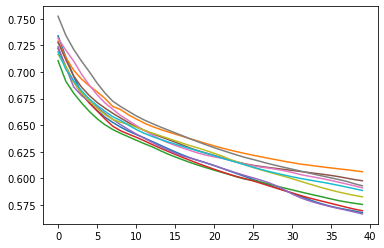

In [44]:
#TestingModel

# Vectorization_4000_test
from numpy.core.fromnumeric import transpose
from datetime import datetime

sum_10_costs=[]
sum_10_accuracy=[]
def vectorization ():

  start_time = datetime.now()
  def merge(data,label):
    set=[]
    for i in range(label.T.shape[1]):
        set.append((data.T[:, i].reshape(1024, 1), label.T[:, i].reshape(4, 1)))
    return set

  W0 = np.random.normal(size=(16,1024))
  W1 = np.random.normal(size=(16, 16))
  W2 = np.random.normal(size=(4, 16))
  b0 = np.zeros((16, 1))
  b1 = np.zeros((16, 1))
  b2 = np.zeros((4, 1))
  costs = []
  avg_cost=0
  num_of_train = 4000
  batch_size = 16
  num_of_epochs = 40
  batch_num = (20//16)
  learning_rate = 0.3
  train_set = []
  test_set = []
  #merge data and  label 
  train_set=merge(train_data_shuffled , train_label_shuffled )
  test_set=merge(test_data_shuffled , test_label_shuffled)

  for epo in range(num_of_epochs):
      
      all_batches = []
      for x in range(0, 4000, batch_size) :
          end=x+batch_size
          all_batches.append(test_set[x:end])

      for ba in all_batches:
          # initialize gradians for weights and bias off all layers
          g_W0 = np.zeros((16, 1024))
          g_W1 = np.zeros((16, 16))
          g_W2 = np.zeros((4, 16))
          g_b0 = np.zeros((16, 1))
          g_b1 = np.zeros((16, 1))
          g_b2 = np.zeros((4, 1))
          
          for _img, label in ba:
              
              a1 = sigmoid(W0 @ _img + b0)
              a2 = sigmoid(W1 @ a1 + b1)
              a3 = sigmoid(W2 @ a2 + b2)



              # The last layer Computing weight
              g_W2 += 2 * (a3 - label) * a3 * (1 - a3) @ np.transpose(a2)
              
              #The last layer Computing bias
              g_b2 += 2 * (a3 - label) * a3 * (1 - a3)


              #3rd layer Computing activation
              delta_2 = np.zeros((16, 1))
              delta_2 += np.transpose(W2) @ (2 * (a3 - label) * (a3 * (1 - a3)))                

              # 3rd layer Computing weight
              g_W1 += ( a2 * (1 - a2) *delta_2) @ np.transpose(a1)
              
              #3rd layer Computing bias
              g_b1 += delta_2 * a2* (1 - a2)
              #  2nd layer computing activation
              delta_1 = np.zeros((16, 1))
              delta_1 +=   np.transpose(W1) @ (delta_2 * a2 * (1 - a2))
              
              # 2nd layer computing weight
              g_W0 += (delta_1 * a1* (1 - a1) ) @ np.transpose(_img)
              # 2nd layer computing bias
              g_b0 += delta_1 * a1* (1 - a1)
          
          W2 = W2 - (learning_rate * (g_W2 / batch_size))
          W1 = W1 - (learning_rate * (g_W1 / batch_size))
          W0 = W0 - (learning_rate * (g_W0 / batch_size))
          
          b2 = b2 - (learning_rate * (g_b2 / batch_size))
          b1 = b1 - (learning_rate * (g_b1 / batch_size))
          b0 = b0 - (learning_rate * (g_b0 / batch_size))
      
      # calculate costs
      cost = 0
      for test_data in test_set[:4000]:
          a0 = test_data[0]
          a1 = sigmoid(W0 @ a0 + b0)
          a2 = sigmoid(W1 @ a1 + b1)
          a3 = sigmoid(W2 @ a2 + b2)

          for j in range(4):
              cost += np.power((a3[j, 0] - test_data[1][j,  0]), 2)
              
      cost /= 4000
      costs.append(cost)
  # plot costs per epoch diagram
  epoch_size = [x for x in range(num_of_epochs)]
  plt.plot(epoch_size, costs)
  avg_cost = sum(costs)/len(costs)
  print("Avg_cost : " + str(avg_cost))
  sum_10_costs.append(avg_cost) 
  # feed forward for calculate accuracy of train
  counter2 = 0
  for test_data in test_set[:4000]:
      a0 = test_data[0]
      a1 = sigmoid(W0 @ a0 + b0)
      a2 = sigmoid(W1 @ a1 + b1)
      a3 = sigmoid(W2 @ a2 + b2)
      
      index = np.where(a3 == np.amax(a3))
      max_index = np.where(test_data[1] == np.amax(test_data[1]))
      
      if index == max_index:
          counter2+= 1
          
  print("Accuracy is : " + str(counter2 / 4000))
  sum_10_accuracy.append(counter2 / 4000)
  end_time = datetime.now()
  print('Duration: {}'.format(end_time - start_time))


for i in range(10):
  print(i+1)
  vectorization()

print("Avg_ten_cost : " + str(sum(sum_10_costs) / len(sum_10_costs)))
print("Avg_ten_Accuracy : " + str(sum(sum_10_accuracy) / len(sum_10_accuracy)))



